In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguin-size-dataset/penguins_size.csv


In [2]:
df = pd.read_csv('/kaggle/input/penguin-size-dataset/penguins_size.csv')
df.head

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.head of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body

## Data Cleaning

In [3]:
# Check for duplicates and NAN values
#df.shape # (344, 7)
df = df.drop_duplicates()

In [4]:
df.shape

(344, 7)

In [5]:
df = df.dropna()
df.shape

(334, 7)

## Data Exploration

In [6]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df['species'].unique()
# ['Adelie', 'Chinstrap', 'Gentoo']

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['island'].unique()
# ['Torgersen', 'Biscoe', 'Dream']

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()
#['MALE', 'FEMALE', '.']

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
df.groupby("sex").size()

sex
.           1
FEMALE    165
MALE      168
dtype: int64

In [11]:
# Dropping thw row with sex='.'
df = df.drop(df[df['sex'] == '.'].index)

In [12]:
df.groupby("sex").size()

sex
FEMALE    165
MALE      168
dtype: int64

In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Univariate Analysis

<Axes: xlabel='species', ylabel='count'>

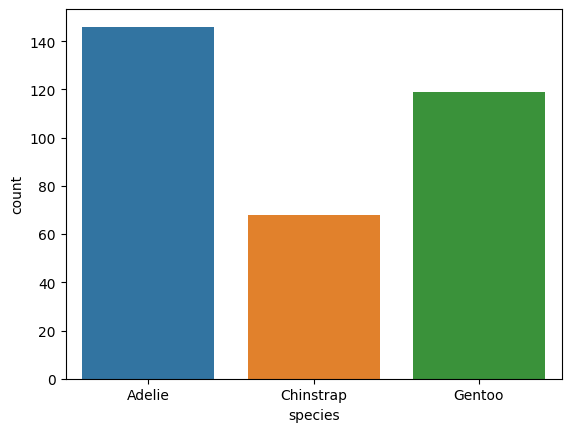

In [14]:
import seaborn as sns
sns.countplot(df, x="species")

<Axes: xlabel='island', ylabel='count'>

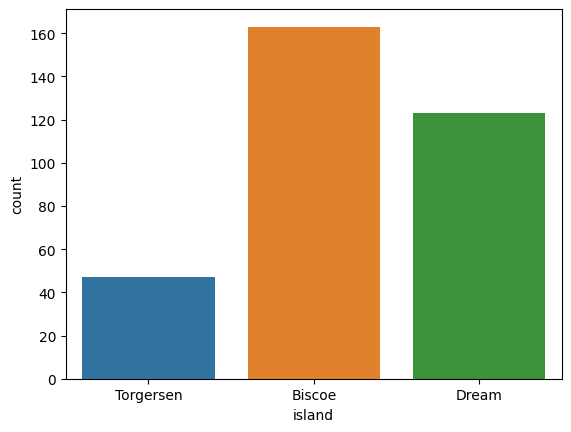

In [15]:
sns.countplot(df, x="island")

<Axes: xlabel='sex', ylabel='count'>

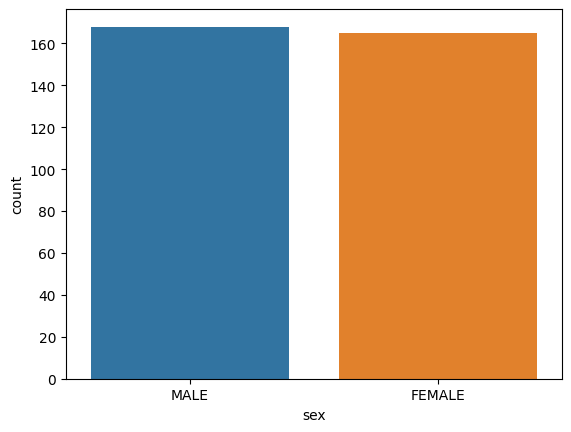

In [16]:
sns.countplot(df, x="sex")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='culmen_length_mm', ylabel='Count'>

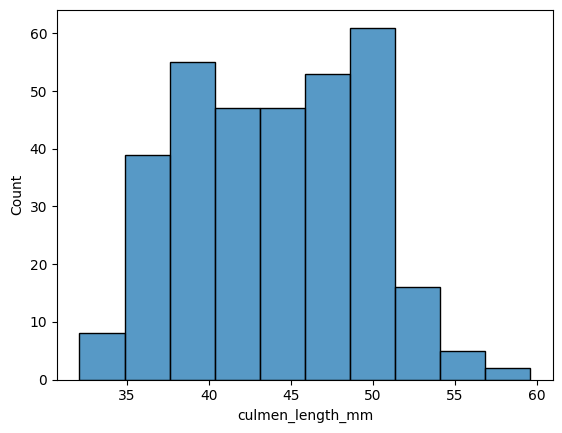

In [17]:
sns.histplot(data=df, x='culmen_length_mm', bins=10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='culmen_depth_mm', ylabel='Count'>

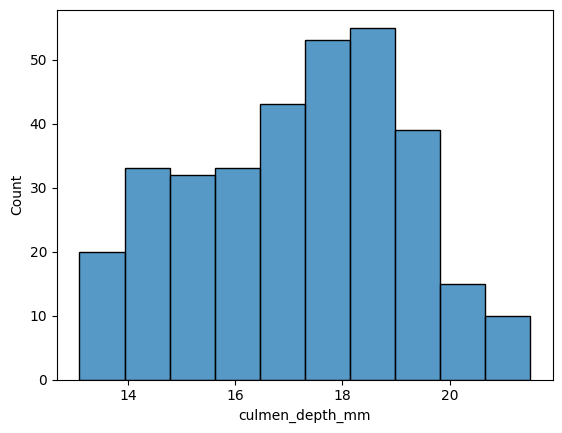

In [18]:
sns.histplot(data=df, x='culmen_depth_mm', bins=10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

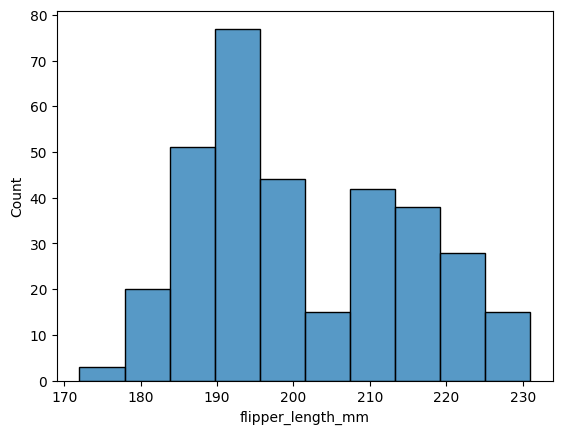

In [19]:
sns.histplot(data=df, x='flipper_length_mm', bins=10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='body_mass_g', ylabel='Count'>

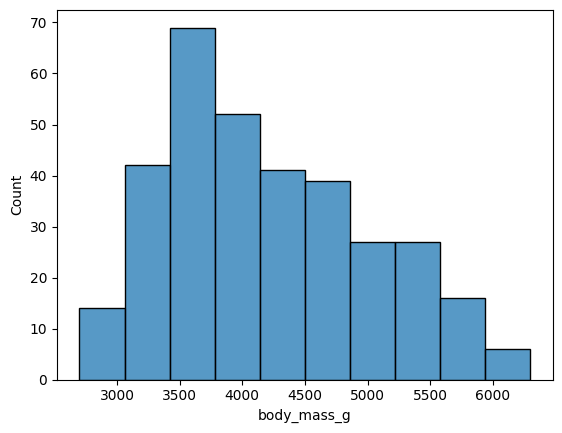

In [20]:
sns.histplot(data=df, x='body_mass_g', bins=10)

## Bivariate Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

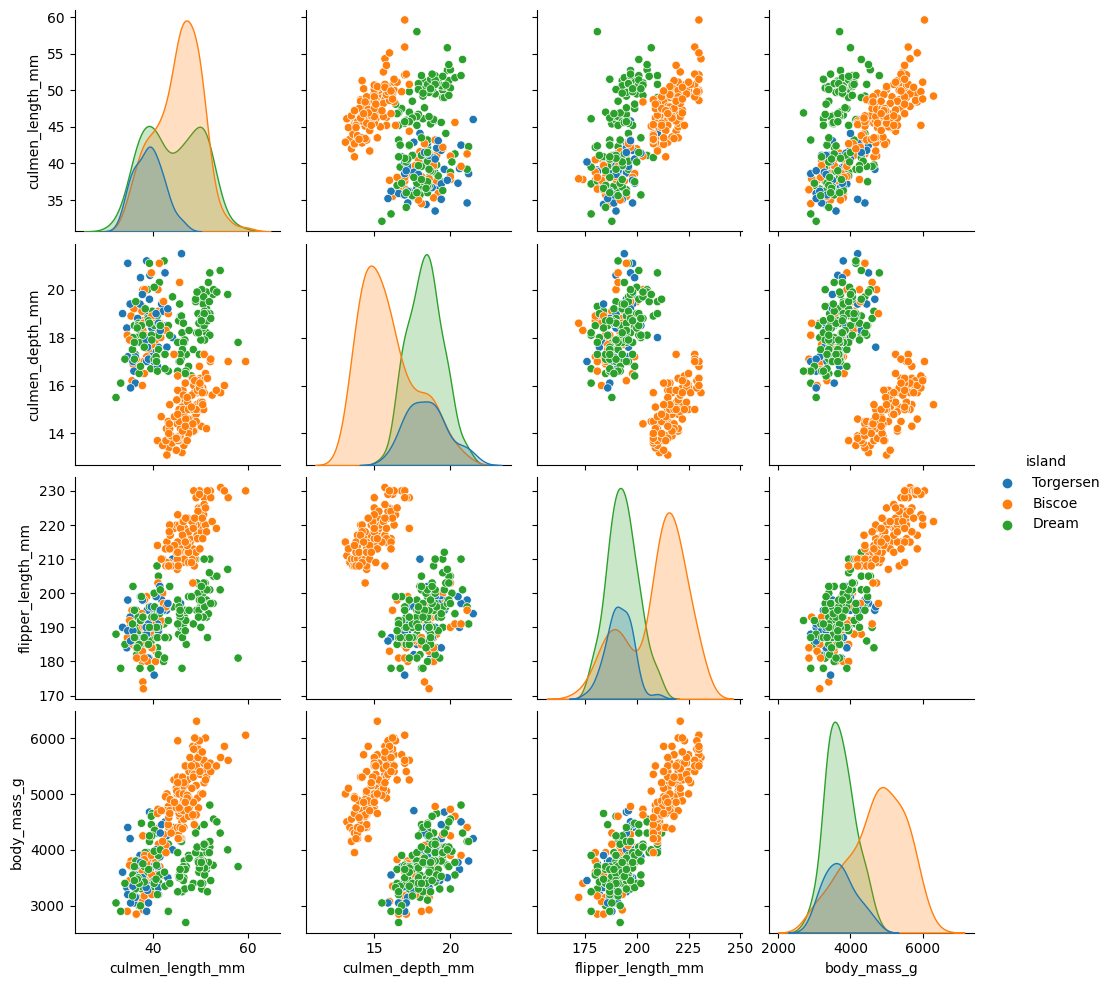

In [21]:
sns.pairplot(df, hue="island")

<Axes: >

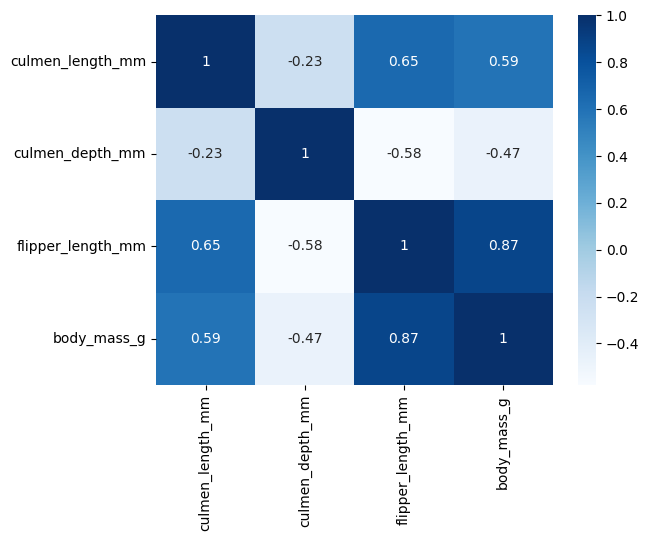

In [22]:
sns.heatmap(data=df[['culmen_length_mm', 'culmen_depth_mm',
                     'flipper_length_mm', 'body_mass_g']].corr(), 
            cmap='Blues', annot=True)

## Finding relation between species and sex

In [23]:
from scipy import stats
crosstab = pd.crosstab(df['species'], df['sex'])
p_value = stats.chi2_contingency(crosstab)[1]
p_value # 
# p_value > 0.05, fail to reject the null hypothesis
#  relation between species and sex

0.9759893689765846

## Finding relation between island and sex

In [24]:
crosstab = pd.crosstab(df['island'], df['sex'])
p_value = stats.chi2_contingency(crosstab)[1]
p_value 
# p_value > 0.05, there is relation between island and sex

0.971611229281065

## Finding relation between island and species

In [25]:
crosstab = pd.crosstab(df['island'], df['species'])
p_value = stats.chi2_contingency(crosstab)[1]
p_value 
# p_value < 0.05, there is no relation between island and species

2.2818915409873682e-60

## Logistic Regression

In [26]:
df['sex'] = df['sex'].map({'FEMALE': 1, 'MALE': 0})

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = df[['culmen_length_mm', 'culmen_depth_mm',
        'flipper_length_mm', 'body_mass_g']]

y = df['sex']

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LogisticRegression()

In [28]:
import numpy as np
log_odds = logr.coef_ 
odds = np.exp(log_odds)
# predicted = logr.predict(X)

In [29]:
print(odds)

[[0.90040325 0.14664013 1.03435182 0.99472776]]


## Scaling the features